## MLE and MAP

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
n = 100
data_deg = 2
model_deg = 4
x_train = np.sort(np.random.uniform(-100,100,size=[n,1]))
x_test = np.sort(np.random.uniform(-120,120,size=[n,1]))
noise = 10*np.random.normal(loc=0,scale=1.0,size=[n,1])
data_power = np.arange(data_deg)
model_power = np.arange(model_deg)
data_theta = np.random.uniform(-.5,.5,[data_deg,1])
X_train = np.tile(x_train, data_deg)
X_test = np.tile(x_test, data_deg)
X_train = np.power(X_train, data_power)
X_test = np.power(X_test, data_power)
y_train = np.matmul(X_train, data_theta) + noise
y_test = np.matmul(X_test, data_theta)
X_train = np.tile(x_train, model_deg)
X_train = np.power(X_train, model_power)
X_test_model = np.tile(x_test, model_deg)
X_test_model = np.power(X_test_model, model_power)

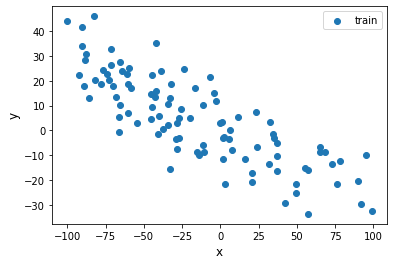

In [66]:
fig, ax = plt.subplots()
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.scatter(x_train, y_train, label='train')
ax.legend()
plt.show()

In [67]:
s = np.linalg.inv(np.matmul(np.transpose(X_train),X_train))
s = np.matmul(s,np.transpose(X_train)) 
theta_ml = np.matmul(s,y_train)
print(np.reshape(data_theta,[1,-1]), "vs\n", np.reshape(theta_ml,[1,-1]))

[[ 0.2986915  -0.31852967]] vs
 [[-1.94568590e+00 -2.51529134e-01  7.21023897e-04 -3.94429696e-06]]


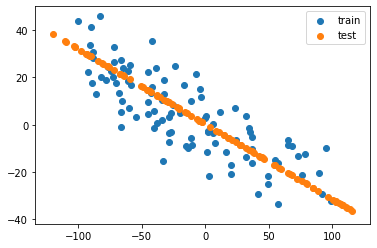

In [68]:
y_test_ml = np.matmul(X_test_model, theta_ml)
fig, ax = plt.subplots()
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='test')
ax.legend()
plt.show()

In [69]:
s = np.matmul(np.transpose(X_train),X_train)
reg = np.identity(s.shape[0])
s = np.linalg.inv(s + reg)
s = np.matmul(s,np.transpose(X_train)) 
theta_map = np.matmul(s,y_train)
print("GT: ", np.reshape(data_theta,[1,-1]), "\nML: ", np.reshape(theta_ml,[1,-1]))
print("MAP:", np.reshape(theta_map,[1,-1]))

GT:  [[ 0.2986915  -0.31852967]] 
ML:  [[-1.94568590e+00 -2.51529134e-01  7.21023897e-04 -3.94429696e-06]]
MAP: [[-1.90424571e+00 -2.51278207e-01  7.13713585e-04 -3.98175306e-06]]


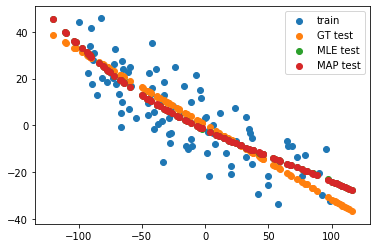

In [70]:
y_test_map = np.matmul(X_test_model, theta_map)
fig, ax = plt.subplots()
plt.scatter(x_train, y_train, label='train')
plt.scatter(x_test, y_test, label='GT test')
plt.scatter(x_test, y_test_ml, label='MLE test')
plt.scatter(x_test, y_test_map, label='MAP test')
ax.legend()
plt.show()

In [71]:
ml_error = ((y_test_ml - y_test)**2).mean()
map_error = ((y_test_map - y_test)**2).mean()
print("ML Error:  ",  ml_error)
print("MAP Error: ",  map_error)

ML Error:   16.94915538764863
MAP Error:  16.76075017932909
